# Fancy subsetting
You should be able to load data.frame and use the ```read.table()``` function well. Remember we want no factors. Check the header, check the quotes and other things. In some cases, encoding is also important.

In [58]:
movies = read.table("../../data/hejtmy-ratings.csv", sep = ",", header = T, stringsAsFactors = F)

Check if everything is alright

Now let's dive deep into fancy subsettings

## Multiple conditions

We subset table by either using indices of rows that we want, or by providing a logical vector. Don't forget that if the length of the vector doesn't match ```nrow()``` then we might get weird results.

Let's start with the slow way and assign logical vectors to variable before subsetting.

In [59]:
table(movies$Title.type)


 Documentary Feature Film  Mini-Series   TV Episode    TV Series 
           4          515            1            2           28 

In [60]:
TVseries_after2000 = (movies$Title.type == "TV Series") & (movies$Year > 2000) #parentheses are useless, just make conditions clear
sum(TVseries_after2000)

[1] 23

Simple way to count number of titles matching condition is by sum function. Sum usually takes integers or numberic variables, but R can "bump" logical TRUE-FALSE to 1-0 and therefore sum all thre true values.

Now that we have that vector we can easily subset movies with it.

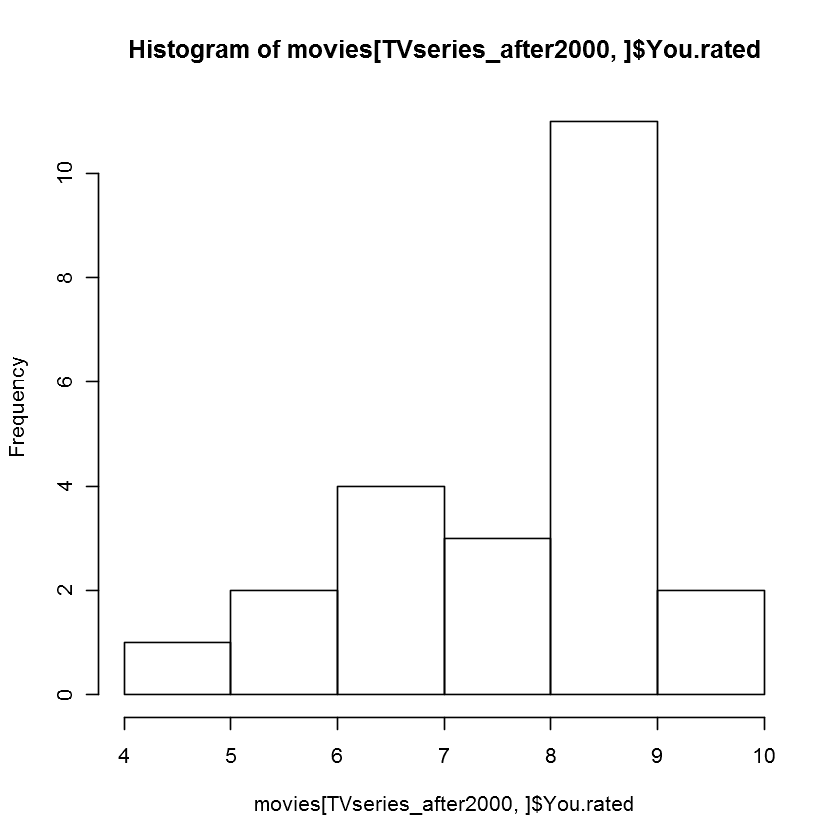

In [61]:
hist(movies[TVseries_after2000,]$You.rated)

You can try as complex subsets as you want.
Try following:


## Function subsetting

You don't have to use comparitng statents to get the subsetting logical vector. For example some subsetting can be done randomly with the use of seq/rep/sample atd. 

In [62]:
set.seed(666)
random20 = sample(c(T, F), size = nrow(movies), prob = c(0.1, 0.9), replace = T)
mean(movies[random20,]$You.rated)

[1] 6.490196

More common are the function that deal with strings, as strings can be directly compared using ==, %in% etc. but can't use <> signs or other more fancy functions.

So if you need to extract all TV things or things that have TV word inside, you can use regex matching funcions - grep, grepl and simillar.

In [63]:
string = "TV series"
grepl("TV", string)

[1] TRUE

Don't forget that it matches the string literally, so only the first of these two conditios work

In [64]:
if (grepl("V ser", string)){print("this one is good")}
if (grepl(" V ser", string)){print("this one is good as well")}

[1] "this one is good"


Now this naturally works for vectors as well

In [65]:
iBat = grepl("Batman", movies$Title)
sum(iBat)
movies[iBat,]

[1] 3

,position,const,created,modified,description,Title,Title.type,Directors,You.rated,IMDb.Rating,Runtime..mins.,Year,Genres,Num..Votes,Release.Date..month.day.year.,URL
10,10,tt0112462,Sat Jun 18 00:00:00 2016,NA,NA,Batman Forever,Feature Film,Joel Schumacher,4,5.4,121,1995,"action, adventure, fantasy",190857,1995-06-09,http://www.imdb.com/title/tt0112462/
11,11,tt0118688,Sat Jun 18 00:00:00 2016,NA,NA,Batman & Robin,Feature Film,Joel Schumacher,2,3.7,125,1997,action,189915,1997-06-12,http://www.imdb.com/title/tt0118688/
97,97,tt0372784,Thu Jul 24 00:00:00 2014,NA,NA,Batman Begins,Feature Film,Christopher Nolan,8,8.3,140,2005,"action, adventure",981394,2005-06-10,http://www.imdb.com/title/tt0372784/


### Regex play

Grepl uses regex expressions. If you don't know what these are, read up a bit :) Regex allows us to parse text to extract parts of titles or first names, html addresses etc. More on that i recoding variables. Nevertheless, we can for example extract all the movies that have number in their title

In [66]:
num_in_title = grepl("[0-9]", movies$Title)
movies[num_in_title,]

,position,const,created,modified,description,Title,Title.type,Directors,You.rated,IMDb.Rating,Runtime..mins.,Year,Genres,Num..Votes,Release.Date..month.day.year.,URL
6,6,tt0416449,Wed Jun 22 00:00:00 2016,NA,NA,300,Feature Film,Zack Snyder,8,7.7,117,2006,"action, drama, fantasy, war",607390,2006-12-09,http://www.imdb.com/title/tt0416449/
7,7,tt1608290,Mon Jun 20 00:00:00 2016,NA,NA,Zoolander 2,Feature Film,Ben Stiller,6,4.8,102,2016,comedy,35091,2016-02-04,http://www.imdb.com/title/tt1608290/
15,15,tt0103064,Thu Jan 28 00:00:00 2016,NA,NA,Terminator 2: Judgment Day,Feature Film,James Cameron,9,8.5,137,1991,"action, sci_fi",745147,1991-07-01,http://www.imdb.com/title/tt0103064/
45,45,tt0100403,Tue Jun 2 00:00:00 2015,NA,NA,Predator 2,Feature Film,Stephen Hopkins,6,6.2,108,1990,"action, horror, sci_fi",105525,1990-11-19,http://www.imdb.com/title/tt0100403/
47,47,tt1136608,Mon Jun 1 00:00:00 2015,NA,NA,District 9,Feature Film,Neill Blomkamp,7,8,112,2009,"action, sci_fi, thriller",531866,2009-08-13,http://www.imdb.com/title/tt1136608/
87,87,tt1646971,Sun Sep 7 00:00:00 2014,NA,NA,How to Train Your Dragon 2,Feature Film,Dean DeBlois,6,7.9,102,2014,"animation, action, adventure, comedy, family, fantasy",221229,2014-05-16,http://www.imdb.com/title/tt1646971/
88,88,tt1335975,Sun Sep 7 00:00:00 2014,NA,NA,47 Ronin,Feature Film,Carl Rinsch,4,6.3,128,2013,"action, adventure, drama, fantasy",117035,2013-12-06,http://www.imdb.com/title/tt1335975/
126,126,tt1229340,Tue Mar 18 00:00:00 2014,NA,NA,Anchorman 2: The Legend Continues,Feature Film,Adam McKay,7,6.3,119,2013,comedy,131282,2013-11-24,http://www.imdb.com/title/tt1229340/
171,171,tt0481369,Sun Oct 27 00:00:00 2013,NA,NA,The Number 23,Feature Film,Joel Schumacher,5,6.4,101,2007,"mystery, thriller",164657,2007-02-13,http://www.imdb.com/title/tt0481369/
179,179,tt1690953,Sat Oct 19 00:00:00 2013,NA,NA,Despicable Me 2,Feature Film,"Pierre Coffin, Chris Renaud",7,7.5,98,2013,"animation, comedy, family, sci_fi",286983,2013-06-16,http://www.imdb.com/title/tt1690953/


Well, we ca see that too many movies have number in the title just because they are a followup of another movie. So let's get rid of those

In [67]:
num_in_title = grepl("[4-9]", movies$Title)
mult_num_in_title = grepl("[0-9][0-9]", movies$Title)
movies[num_in_title | mult_num_in_title,]

,position,const,created,modified,description,Title,Title.type,Directors,You.rated,IMDb.Rating,Runtime..mins.,Year,Genres,Num..Votes,Release.Date..month.day.year.,URL
6,6,tt0416449,Wed Jun 22 00:00:00 2016,NA,NA,300,Feature Film,Zack Snyder,8,7.7,117,2006,"action, drama, fantasy, war",607390,2006-12-09,http://www.imdb.com/title/tt0416449/
47,47,tt1136608,Mon Jun 1 00:00:00 2015,NA,NA,District 9,Feature Film,Neill Blomkamp,7,8,112,2009,"action, sci_fi, thriller",531866,2009-08-13,http://www.imdb.com/title/tt1136608/
88,88,tt1335975,Sun Sep 7 00:00:00 2014,NA,NA,47 Ronin,Feature Film,Carl Rinsch,4,6.3,128,2013,"action, adventure, drama, fantasy",117035,2013-12-06,http://www.imdb.com/title/tt1335975/
171,171,tt0481369,Sun Oct 27 00:00:00 2013,NA,NA,The Number 23,Feature Film,Joel Schumacher,5,6.4,101,2007,"mystery, thriller",164657,2007-02-13,http://www.imdb.com/title/tt0481369/
181,181,tt0486576,Sat Oct 19 00:00:00 2013,NA,NA,4: Rise of the Silver Surfer,Feature Film,Tim Story,3,5.6,92,2007,"action, adventure, sci_fi, thriller",213326,2007-06-12,http://www.imdb.com/title/tt0486576/
201,201,tt1022603,Fri Oct 4 00:00:00 2013,NA,NA,(500) Days of Summer,Feature Film,Marc Webb,6,7.7,95,2009,"comedy, drama, romance",376716,2009-01-17,http://www.imdb.com/title/tt1022603/
240,240,tt0165832,Sun Jun 23 00:00:00 2013,NA,NA,Interstate 60: Episodes of the Road,Feature Film,Bob Gale,7,7.7,116,2002,"adventure, comedy, drama, fantasy",23483,2002-04-13,http://www.imdb.com/title/tt0165832/
246,246,tt1306980,Wed May 15 00:00:00 2013,NA,NA,50/50,Feature Film,Jonathan Levine,8,7.7,100,2011,"comedy, drama, romance",270497,2011-09-12,http://www.imdb.com/title/tt1306980/
286,286,tt0472033,Sun Feb 17 00:00:00 2013,NA,NA,9,Feature Film,Shane Acker,6,7.1,79,2009,"animation, action, adventure, drama, mystery, sci_fi, thriller",111144,2009-08-19,http://www.imdb.com/title/tt0472033/
399,399,tt1232829,Mon Jul 30 00:00:00 2012,NA,NA,21 Jump Street,Feature Film,"Phil Lord, Christopher Miller",6,7.2,109,2012,"action, comedy, crime",408441,2012-03-12,http://www.imdb.com/title/tt1232829/


Boring and useless? Possibly. But use this knowledge to tell me wha do I like more. Sci_fi or mystery movies?